In [1]:
def solution_text(arr):
    text='Scratchpad: '
    N = len(arr)
    dp = [0 for _ in range(N)]
    dp[N - 1] = max(arr[N - 1], 0)
    text+=f'dp[{N-1}] = max(input[{N-1}], 0) = max({arr[N-1]}, 0) = {dp[N-1]}\n'
    dp[N - 2] = max(max(arr[N - 1], arr[N - 2]), 0)
    text+=f'dp[{N-2}] = max(input[{N-2}], input[{N-1}], 0) = max({arr[N-2]}, {arr[N-1]}, 0) = {dp[N-2]}\n'
    for i in range(N - 3, -1, -1):
        dp[i] = max(max(dp[i + 1], arr[i] + dp[i + 2]), 0)
        text+=f'dp[{i}] = max(dp[{i+1}], input[{i}] + dp[{i+2}], 0) = max({dp[i+1]}, {arr[i]} + {dp[i+2]}, 0) = {dp[i]}\n'
        
    text+='\nFinally, we reconstruct the lexicographically smallest subsequence that fulfills the task objective by selecting numbers as follows. We store the result on a list named "output".\n\n'
    text+='Let can_use_next_item = True.\n'
    
    result = []
    can_use_next_item_arr=[]
    can_use_next_item = True
    can_use_next_item_arr.append(True)
    for i in range(N - 2):
        if dp[i] == arr[i] + dp[i + 2] and can_use_next_item:
            result.append(1)
            can_use_next_item = False
            can_use_next_item_arr.append(False)
            text+=f'Since dp[{i}] == input[{i}] + dp[{i+2}] ({dp[i]} == {arr[i]} + {dp[i+2]}) and can_use_next_item == True, we store output[{i}] = 1. We update can_use_next_item = False.\n'
        else:
            result.append(2)
            can_use_next_item = True
            can_use_next_item_arr.append(True)
            text+=f'Since dp[{i}] != input[{i}] + dp[{i+2}] ({dp[i]} != {arr[i]} + {dp[i+2]}) or can_use_next_item == False, we store output[{i}] = 2. We update can_use_next_item = True.\n'

    if dp[N - 2] == arr[N - 2] and can_use_next_item:
        result.append(1)
        can_use_next_item = False
        can_use_next_item_arr.append(False)
        text+=f'Since dp[{N-2}] == input[{N-2}] ({dp[N-2]} == {arr[N-2]}) and can_use_next_item == True, we store output[{N-2}] = 1. We update can_use_next_item = False.\n'
    else:
        result.append(2)
        can_use_next_item = True
        can_use_next_item_arr.append(True)
        text+=f'Since dp[{N-2}] != input[{N-2}] ({dp[N-2]} != {arr[N-2]}) or can_use_next_item == False, we store output[{N-2}] = 2. We update can_use_next_item = True.\n'

    if dp[N - 1] == arr[N - 1] and can_use_next_item:
        result.append(1)
        text+=f'Since dp[{N-1}] == input[{N-1}] ({dp[N-1]} == {arr[N-1]}) and can_use_next_item == True, we store output[{N-1}] = 1.\n'
    else:
        result.append(2)
        text+=f'Since dp[{N-1}] != input[{N-1}] ({dp[N-1]} != {arr[N-1]}) or can_use_next_item == False, we store output[{N-1}] = 2.\n'
        
    text+=f'\nReconstructing all together, output={result}.'

    return result,dp,can_use_next_item_arr,text

outs=solution_text([3,2,1,5,2])
print(outs)


([1, 2, 2, 1, 2], [8, 7, 5, 5, 2], [True, False, True, True, False], 'Scratchpad: dp[4] = max(input[4], 0) = max(2, 0) = 2\ndp[3] = max(input[3], input[4], 0) = max(5, 2, 0) = 5\ndp[2] = max(dp[3], input[2] + dp[4], 0) = max(5, 1 + 2, 0) = 5\ndp[1] = max(dp[2], input[1] + dp[3], 0) = max(5, 2 + 5, 0) = 7\ndp[0] = max(dp[1], input[0] + dp[2], 0) = max(7, 3 + 5, 0) = 8\n\nFinally, we reconstruct the lexicographically smallest subsequence that fulfills the task objective by selecting numbers as follows. We store the result on a list named "output".\n\nLet can_use_next_item = True.\nSince dp[0] == input[0] + dp[2] (8 == 3 + 5) and can_use_next_item == True, we store output[0] = 1. We update can_use_next_item = False.\nSince dp[1] != input[1] + dp[3] (7 != 2 + 5) or can_use_next_item == False, we store output[1] = 2. We update can_use_next_item = True.\nSince dp[2] != input[2] + dp[4] (5 != 1 + 2) or can_use_next_item == False, we store output[2] = 2. We update can_use_next_item = True.\nSi

In [2]:
import itertools

def generate_lists(length):
    numbers = range(-5, 6)  # Integers from -5 to 5 inclusive.
    # Convert tuples to lists.
    return [list(item) for item in itertools.product(numbers, repeat=length)]

dataset=[]

for list_length in range(2,6):
    samples=generate_lists(list_length)
    #if list_length==4:samples=random.sample(samples,5000)
    #if list_length==5:samples=random.sample(samples,9000)
    
    print(len(samples))
    for arr in samples:
        inp=f"Question: Let's solve input = {arr}."
        output=solution_text(arr)[-1]
        dataset.append({"input": inp, "output": output})

print(len(dataset))

121
1331
14641
161051
177144


In [3]:
import re
import random
def find_array_length(s):
    # Regular expression to find an array pattern
    match = re.search(r'\[(-?\d+,\s*)*(-?\d+)\]', s)
    if match:
        # Extracting the array string
        array_str = match.group(0)
        # Splitting the array string into elements
        array_elements = array_str[1:-1].split(',')
        return len(array_elements)
    else:
        return None

In [4]:
resampled_data=[]
for dat in dataset:
    prompt=dat['input']
    if find_array_length(prompt)==2:
        resampled_data.extend([dat]*100)
        continue
    if find_array_length(prompt)==3:
        resampled_data.extend([dat]*10)
        continue
    if find_array_length(prompt)==4:
        resampled_data.extend([dat]*3)
        continue
    resampled_data.append(dat)

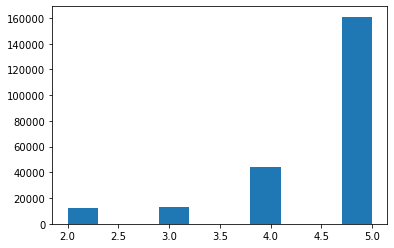

In [5]:
import matplotlib.pyplot as plt
lengths2=[]
for point in resampled_data:
    lengths2.append(find_array_length(point['input']))
plt.hist(lengths2)
plt.show()

In [7]:
import json
with open("nonrec_dp_resampled_test.json", "w") as f:
    json.dump(resampled_data, f, indent=4)